In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
#--BASE--#
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import datetime
import os
import warnings
from datetime import timedelta
import funciones

#--VISUALIZACIÓN--#
import matplotlib as mpl
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#--CONFIGURACIÓN--#
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

### Lectura de los dataframes

In [3]:
Sup = pd.read_excel('../DATOS/API_superficie_cultivada/TOTAL/TOTAL.xlsx')
pp = pd.read_csv('../DATOS/Clima/TOTAL_STATES_PP.csv')
Temp = pd.read_csv('../DATOS/Clima/TOTAL_STATES_T.csv')

In [4]:
Sup = Sup[['commodity_desc', 'state_name', 'year', 'Value']]

In [5]:
Sup.head()

commodity_desc  state_name  year     Value
0         BARLEY     ARIZONA  1950  77295.03
1         BARLEY    ARKANSAS  1950   2832.80
2         BARLEY  CALIFORNIA  1950 827178.18
3         BARLEY    COLORADO  1950 332651.89
4         BARLEY    DELAWARE  1950   6474.98

In [6]:
pp

State  date    Months  Precipitation
0        Idaho  1950   January         121.92
1        Idaho  1951   January          79.50
2        Idaho  1952   January          77.47
3        Idaho  1953   January         143.00
4        Idaho  1954   January         108.20
...        ...   ...       ...            ...
42331  Georgia  2017  December          81.03
42332  Georgia  2018  December         244.60
42333  Georgia  2019  December         166.12
42334  Georgia  2020  December          78.74
42335  Georgia  2021  December         106.93

[42336 rows x 4 columns]

In [7]:
Temp

State  date    Months  Temperature
0        Idaho  1950   January        -8.44
1        Idaho  1951   January        -6.11
2        Idaho  1952   January        -7.33
3        Idaho  1953   January         0.89
4        Idaho  1954   January        -3.06
...        ...   ...       ...          ...
42331  Georgia  2017  December         9.61
42332  Georgia  2018  December        10.11
42333  Georgia  2019  December        11.28
42334  Georgia  2020  December         8.00
42335  Georgia  2021  December        13.61

[42336 rows x 4 columns]

In [8]:
Temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42336 entries, 0 to 42335
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        42336 non-null  object 
 1   date         42336 non-null  int64  
 2   Months       42336 non-null  object 
 3   Temperature  42336 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [9]:
Temp['date'] = Temp['date'].astype(str)
pp['date'] = pp['date'].astype(str)

In [10]:
#concatenado

Temp['concat'] = Temp['State'] + Temp['date'] + Temp ['Months']
pp['concat'] = pp['State'] + pp['date'] + pp ['Months']

In [11]:
clima = Temp.merge(pp, right_on='concat', left_on='concat', how = 'outer')

In [12]:
clima.isnull().sum()

State_x          0
date_x           0
Months_x         0
Temperature      0
concat           0
State_y          0
date_y           0
Months_y         0
Precipitation    0
dtype: int64

In [13]:
#Modificación de las columnas

clima.drop(columns=['concat', 'State_y','date_y', 'Months_y'], inplace = True)
clima.rename(columns=({'State_x':'State', 'date_x': 'Date', 'Months_x': 'Months'}), inplace= True)

In [14]:
clima.head()

State  Date   Months  Temperature  Precipitation
0  Idaho  1950  January        -8.44         121.92
1  Idaho  1951  January        -6.11          79.50
2  Idaho  1952  January        -7.33          77.47
3  Idaho  1953  January         0.89         143.00
4  Idaho  1954  January        -3.06         108.20

In [15]:
px.scatter(
        clima,
        y = 'Precipitation',  
        x = 'Temperature', 
        trendline="ols",
        color = 'Months',
        height=600, width=800,
        title='correlacción entre Tª y pp')

In [16]:
# Estacionalidad

clima1 = pd.DataFrame(clima.groupby(['Months','Date'])['Temperature'].mean())
#se suaviza la serie
al_pd = clima1.rolling(window=5, center=True, win_type='triang').mean()
piv_T = pd.pivot_table(al_pd, index=['Months'],columns=['Date'], values=['Temperature'])

Influencia de la temperatura y la precipitació en las superfices para cada año

In [17]:
piv_T

Temperature                                                        \
Date             1950  1951  1952  1953  1954  1955  1956  1957  1958  1959   
Months                                                                        
April             NaN   NaN  9.89 10.31 10.63 10.58 10.28 10.15 10.22 10.27   
August          17.64 20.36 21.76 22.00 22.09 22.12 21.96 21.93 22.01 22.17   
December         7.38  2.45  0.20  0.23  0.19  0.28  0.60  0.74  0.23 -0.18   
February         1.48  1.22  1.43  1.69  1.64  1.06  0.58  0.23 -0.30 -0.31   
January         -0.52 -0.57 -0.30 -0.34 -0.90 -1.63 -2.10 -2.30 -2.10 -2.14   
July            15.11 20.15 22.89 23.15 23.18 23.08 22.81 22.67 22.53 22.54   
June            21.14 20.54 20.60 20.57 20.37 20.05 20.06 20.10 20.07 20.09   
March            9.23  5.48  3.74  4.22  4.14  4.11  3.84  3.86  3.35  3.24   
May             12.60 14.52 15.33 15.33 15.27 15.54 15.66 15.83 15.81 15.64   
November         7.83  5.46  4.79  5.14  5.12  4.67  4.70  4.80  5.08  4.95   
October         10.60 11.53 12.02 12.19 12.39 12.33 12.06 11.68 11.67 11.73   
September       16.03 17.25 18.01 18.31 18.33 18.13 17.88 17.84 17.99 18.18   

                                                                             \
Date       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970   
Months                                                                        
April     10.12  9.87  9.99 10.15 10.19 10.06  9.92 10.14 10.29 10.32  9.97   
August    22.11 21.93 21.63 21.39 21.18 21.16 21.19 21.35 21.60 21.86 21.96   
December  -0.78 -1.10 -1.46 -1.34 -0.67  0.02  0.11 -0.18 -0.58 -0.29 -0.04   
February  -0.16  0.31  0.08 -0.38 -0.78 -0.90 -0.97 -1.01 -0.86 -0.50 -0.22   
January   -2.20 -2.74 -2.92 -2.83 -2.36 -1.97 -1.91 -1.82 -2.34 -2.72 -3.12   
July      22.40 22.31 22.28 22.40 22.59 22.59 22.61 22.48 22.57 22.54 22.49   
June      20.06 20.10 20.03 19.97 19.84 19.72 19.73 19.77 19.84 19.93 20.01   
March      2.95  3.68  3.94  4.20  3.79  3.76  4.29  4.53  4.35  3.47  3.28   
May       15.46 15.37 15.67 15.89 15.98 15.55 14.94 14.52 14.69 15.08 15.34   
November   5.09  5.22  5.57  5.86  6.02  5.92  5.54  5.09  4.89  4.86  4.83   
October   12.01 12.41 12.69 12.77 12.18 11.73 11.44 11.52 11.54 11.63 11.72   
September 18.16 17.99 17.70 17.52 17.34 17.24 17.23 17.35 17.62 17.87 18.04   

                                                                             \
Date       1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981   
Months                                                                        
April      9.65  9.57  9.51  9.64  9.76 10.30 10.54 10.52 10.47 10.44 10.32   
August    21.91 21.79 21.76 21.61 21.57 21.52 21.63 21.77 21.86 21.91 21.96   
December   0.29  0.22  0.33  0.10 -0.17 -0.71 -0.60 -0.31  0.22  0.45  0.22   
February  -0.17 -0.22 -0.17  0.32  0.82  0.85 -0.27 -1.68 -2.06 -1.28  0.02   
January   -2.72 -2.06 -1.37 -1.07 -1.63 -2.76 -4.10 -4.32 -3.84 -2.96 -2.51   
July      22.33 22.32 22.49 22.61 22.68 22.65 22.71 22.79 22.92 23.03 23.00   
June      20.13 20.03 19.98 19.82 19.91 20.01 20.13 20.05 19.98 19.88 19.83   
March      3.76  4.82  5.35  5.30  4.99  4.95  5.05  4.79  4.63  4.43  4.73   
May       15.16 15.06 15.07 15.23 15.45 15.51 15.64 15.51 15.44 15.40 15.30   
November   4.82  4.85  5.27  5.27  5.25  4.87  5.08  5.16  5.43  5.48  5.71   
October   11.98 11.88 12.00 11.57 11.42 10.96 11.19 11.32 11.46 11.24 11.23   
September 18.07 17.85 17.51 17.12 17.12 17.44 17.94 18.26 18.31 18.17 17.94   

                                                                             \
Date       1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992   
Months                                                                        
April      9.67  9.46  9.78 10.60 10.94 10.91 10.66 10.66 10.72 10.69 10.51   
August    22.14 22.30 22.13 21.81 21.71 21.87 22.12 22.11 21.96 21.78 21.55   
December   0.13 -0.59 -0.39 -0.47  0.28 -0.05 -0.45 -0.98

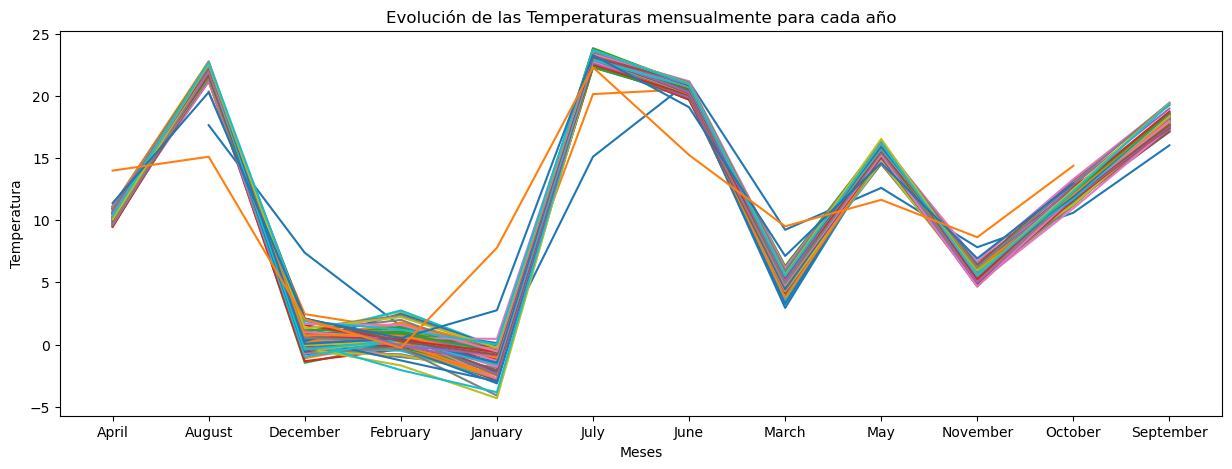

In [18]:
plt.figure(figsize=(15,5))
plt.plot(piv_T) 
plt.xlabel("Meses")  
plt.ylabel("Temperatura")  
plt.title("Evolución de las Temperaturas mensualmente para cada año")  
plt.show()

In [19]:
# Estacionalidad

clima1 = pd.DataFrame(clima.groupby(['Months','Date'])['Precipitation'].mean())
#se suaviza la serie
al_pd = clima1.rolling(window=5, center=True, win_type='triang').mean()
piv_PP = pd.pivot_table(al_pd, index=['Months'],columns=['Date'], values=['Precipitation'])

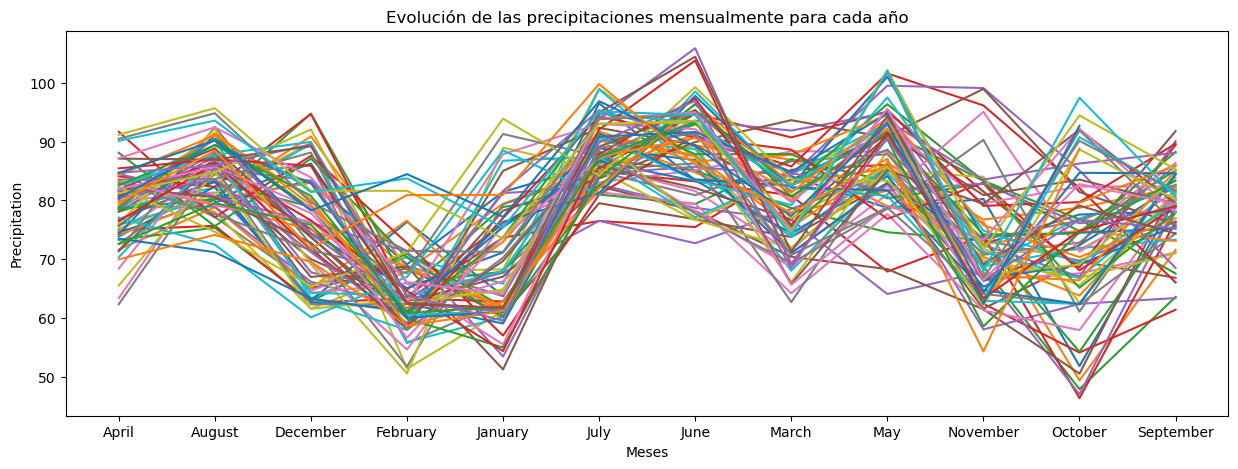

In [20]:
plt.figure(figsize=(15,5))
plt.plot(piv_PP) 
plt.xlabel("Meses")  
plt.ylabel("Precipitation")  
plt.title("Evolución de las precipitaciones mensualmente para cada año")  
plt.show()

In [21]:
###relaciones no lineales con diagramas de dependencia parcial (PDP)

In [22]:
Sup1 = pd.DataFrame(Sup.groupby(['commodity_desc', 'year'])['Value'].sum())
Sup1.reset_index(inplace = True)
Sup1.head()

commodity_desc  year     Value
0        ALMONDS  1996 173205.61
1        ALMONDS  2007 258999.04
2        ALMONDS  2008 287327.06
3        ALMONDS  2009 303514.50
4        ALMONDS  2010 311608.22

In [23]:
fig = px.line(Sup1, x = 'year', y = 'Value', color = 'commodity_desc')
fig.update_yaxes(title_text='Hectáreas')
fig.update_xaxes(title_text='')
fig.show()

In [24]:
pp1 = pd.DataFrame(pp.groupby('date')['Precipitation'].mean())
pp1.reset_index(inplace = True)
px.line(pp1, x = 'date', y = 'Precipitation')

In [25]:
Temp1 = pd.DataFrame(Temp.groupby('date')['Temperature'].mean())
Temp1.reset_index(inplace = True)
px.line(Temp1, x = 'date', y = 'Temperature')

In [26]:
clima_año = Temp1.merge(pp1, right_on='date', left_on='date', how = 'outer')
clima_año

date  Temperature  Precipitation
0   1950        10.23          78.37
1   1951        10.30          80.45
2   1952        10.91          70.47
3   1953        11.50          74.93
4   1954        11.21          70.51
5   1955        10.55          72.39
6   1956        10.68          69.88
7   1957        10.79          80.17
8   1958        10.31          77.50
9   1959        10.74          78.95
10  1960        10.25          73.43
11  1961        10.50          79.99
12  1962        10.38          72.91
13  1963        10.51          64.60
14  1964        10.48          75.09
15  1965        10.44          70.06
16  1966        10.26          69.88
17  1967        10.36          75.64
18  1968        10.24          74.32
19  1969        10.30          76.95
20  1970        10.41          74.26
21  1971        10.48          77.08
22  1972        10.17          85.14
23  1973        11.00          88.23
24  1974        10.71          78.03
25  1975        10.56          86.70
26  1976        10.23          69.52
27  1977        10.82          79.81
28  1978        10.03          75.41
29  1979        10.14          86.90
30  1980        10.66          70.41
31  1981        11.00          73.54
32  1982        10.35          82.67
33  1983        10.66          89.10
34  1984        10.69          80.49
35  1985        10.36          75.26
36  1986        11.24          76.90
37  1987        11.33          73.00
38  1988        10.83          67.50
39  1989        10.41          79.84
40  1990        11.62          84.30
41  1991        11.47          80.41
42  1992        10.75          77.83
43  1993        10.36          80.82
44  1994        10.99          79.57
45  1995        10.94          79.03
46  1996        10.40          88.49
47  1997        10.69          78.15
48  1998        12.11          83.92
49  1999        11.68          74.17
50  2000        11.13          73.78
51  2001        11.53          72.24
52  2002        11.44          76.77
53  2003        11.09          83.71
54  2004        11.21          83.16
55  2005        11.50          79.13
56  2006        11.91          79.58
57  2007        11.50          72.99
58  2008        10.82          83.27
59  2009        10.81          85.37
60  2010        11.38          77.88
61  2011        11.46          84.15
62  2012        12.44          71.38
63  2013        10.90          81.96
64  2014        10.75          79.69
65  2015        11.83          84.98
66  2016        12.29          76.82
67  2017        11.99          81.47
68  2018        11.53          93.33
69  2019        11.23          88.60
70  2020        11.99          81.90
71  2021        12.02          79.47

In [27]:
Sup1.head()

commodity_desc  year     Value
0        ALMONDS  1996 173205.61
1        ALMONDS  2007 258999.04
2        ALMONDS  2008 287327.06
3        ALMONDS  2009 303514.50
4        ALMONDS  2010 311608.22

In [28]:
clima_año['date'] = clima_año['date'].astype(int)

In [29]:
Sup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   commodity_desc  2428 non-null   object 
 1   year            2428 non-null   int64  
 2   Value           2428 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 57.0+ KB


In [30]:
concat_clima_sup1 = clima_año.merge(Sup1, right_on='year', left_on='date', how= 'outer')
concat_clima_sup1.dropna(inplace = True)
concat_clima_sup1.drop(columns='year', inplace = True)

In [31]:
concat_clima_sup1

date  Temperature  Precipitation  commodity_desc       Value
0     1950        10.23          78.37          BARLEY  6018490.19
1     1950        10.23          78.37           BEANS   674206.88
2     1950        10.23          78.37            CORN 36371963.62
3     1950        10.23          78.37          COTTON  8742107.91
4     1950        10.23          78.37        FLAXSEED  1729627.96
...    ...          ...            ...             ...         ...
2424  2021        12.02          79.47  SWEET POTATOES    62119.30
2425  2021        12.02          79.47      TANGERINES    30270.51
2426  2021        12.02          79.47        TOMATOES   203961.74
2427  2021        12.02          79.47         WALNUTS   157827.54
2428  2021        12.02          79.47           WHEAT 37830047.28

[2428 rows x 5 columns]

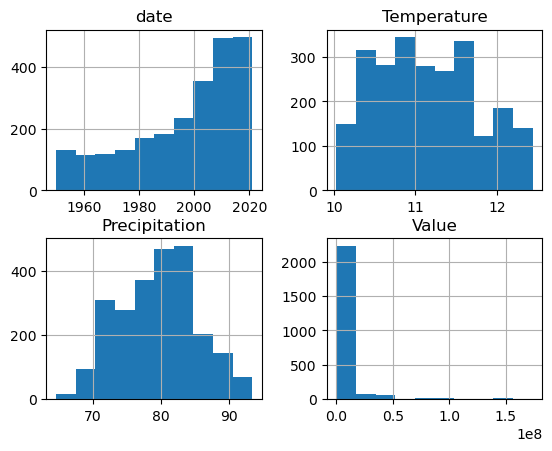

In [32]:
concat_clima_sup1.hist();

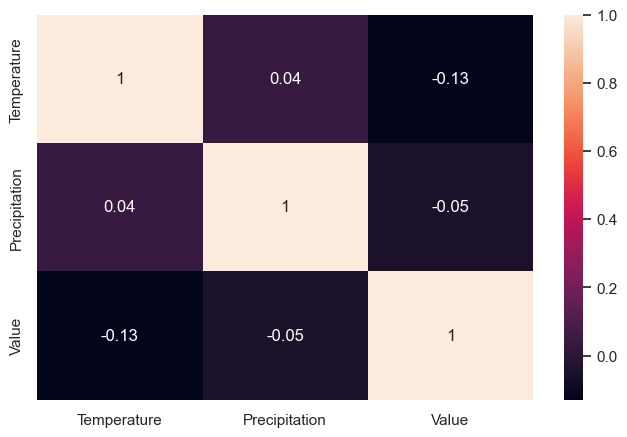

In [33]:
# Correlacción de variables
sns.set(rc={'figure.figsize':(8,5)})
correlation_matrix = concat_clima_sup1[['Temperature','Precipitation', 'Value']].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);

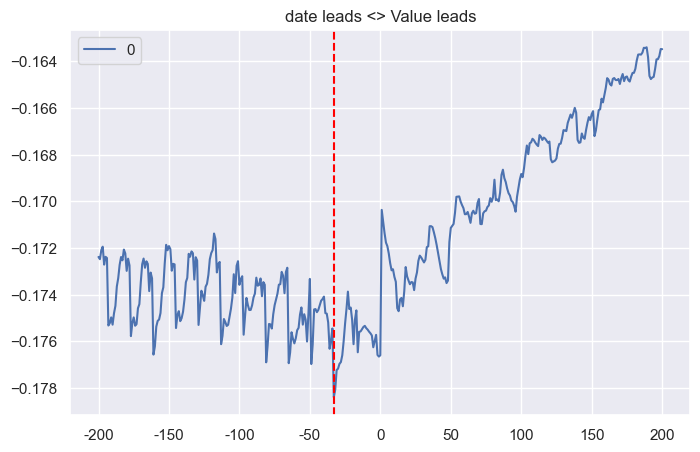

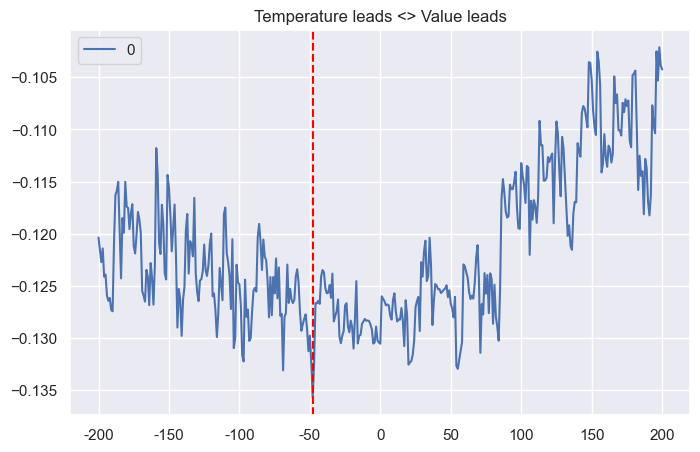

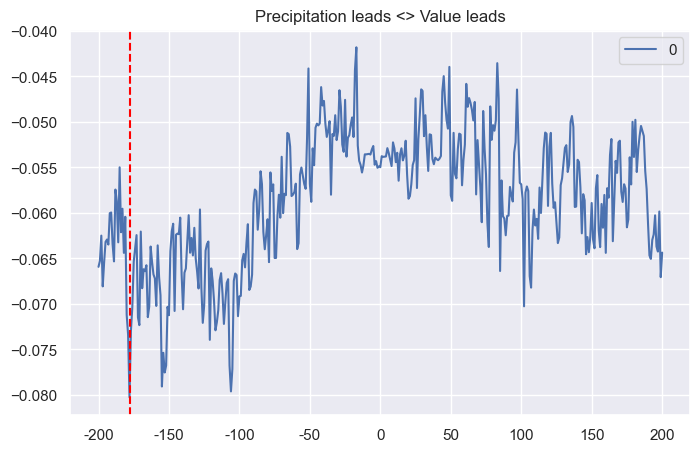

In [34]:
for i in concat_clima_sup1[['date', 'Temperature', 'Precipitation']][concat_clima_sup1.date != 0].columns:
    series1 = i
    series2 = 'Value'

    rs, offset, peak = funciones.corr_lag(series1, series2, concat_clima_sup1)

    ticks = range(0,2*200+1,50)
    tick_labels = range(-200,201,50)

    rs.plot()
    plt.xticks(ticks = ticks,labels = tick_labels)
    plt.axvline(peak,color = "red",linestyle="--",label = "Peak")
    plt.title('{} leads <> {} leads'.format(series1,series2))
    plt.show()


interval columns not set, guessing: ['date', 'Temperature', 'Precipitation', 'Value']


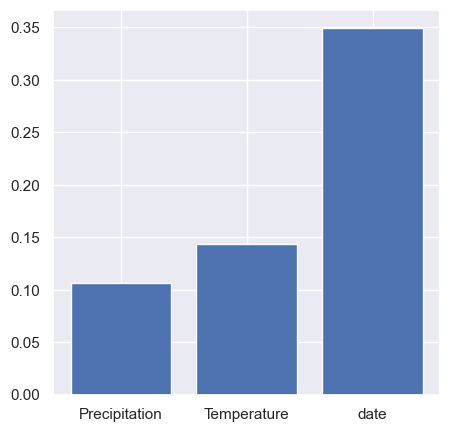

In [35]:
#correlacción no lineal:

from phik import phik_matrix
plt.figure(figsize=(5,5))
corr = concat_clima_sup1.phik_matrix().sort_values('Value')
plt.bar(corr.index[:-2], corr['Value'][:-2]);

In [36]:
#### por aquí, creo que es buena idea dividir por cultivos...

In [37]:
clima2 = pd.pivot_table(clima, index=['Date'], values=['Temperature', 'Precipitation'])

In [38]:
Sup2 = pd.pivot_table(Sup, index=['year'],columns=['commodity_desc'], values=['Value'])

In [39]:
clima2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1950 to 2021
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  72 non-null     float64
 1   Temperature    72 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [40]:
Sup2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1950 to 2021
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Value, ALMONDS)              15 non-null     float64
 1   (Value, APPLES)               14 non-null     float64
 2   (Value, APRICOTS)             14 non-null     float64
 3   (Value, ARTICHOKES)           23 non-null     float64
 4   (Value, ASPARAGUS)            23 non-null     float64
 5   (Value, AVOCADOS)             13 non-null     float64
 6   (Value, BARLEY)               71 non-null     float64
 7   (Value, BEANS)                71 non-null     float64
 8   (Value, BEETS)                4 non-null      float64
 9   (Value, BROCCOLI)             23 non-null     float64
 10  (Value, BRUSSELS SPROUTS)     4 non-null      float64
 11  (Value, CABBAGE)              23 non-null     float64
 12  (Value, CANOLA)               30 non-null     float64
 13  (V

In [41]:
concat2 = Sup2.merge(clima2, right_index= True, left_index=True, how='outer')